# Project
***
## Cian Hogan
## GMIT Data Analytics 2020
## Fundamentals of Data Analysis Module¶

# Project Instructions
***
*Perform and explain simple linear regression using Python on the powerproduction dataset available [HERE](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv) [1].*

*The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.*

## Initial Analysis
***
We start the analysis by importing the packages we are going to use for the data analysis. Pandas is imported for storing the data in a DataFrame. Numpy is used for it's array computations and advanced computation functions. Matplotlib's pyplot package is imported for data visualisations.

We set the style of the plots used to the Seaborn style and use the matplotlib inline magic command to ensure the plots display within the notebook correctly [2][3].

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

### Import Data
We import the data using the Panda's function read_csv which takes a filepath or link to a csv file. We provide the url for the power production data and store the data in the variable **powerProduction** [4].

Pandas has some buit in functions we can use to get an idea of makeup of the data. **head()** allows us to look at the first five values in the powerProduction while **tails()** shows us the last five values in the data [5][6]. This allows us to easily eyeball the data to see if there are any clear anomalys. 

We can see that in the 10 values shown in the head and tail that each entry has a power output of 0. This could mean that there is an issue with the data so it is important we investigate more to make sure the data is valid.

In [2]:
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"

powerProduction = pd.read_csv(url)

In [3]:
print(powerProduction.head(), powerProduction.tail())

   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0       speed  power
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


Pandas has the function **describe()** which generates desctipitve statistics for the given DataFrame. Here it shows us the mean, standard deviation and the interquartile ranges of the data [7]. Unlike above with the head and tail of the data we do have results for power output. This would suggest we do have valid data but that maybe there is something at the very lowest and highest levels of wind speed there seems to be no power output or the output does not get measured.

In [4]:
powerProduction.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### Visualising the Data
Next we want to plot the data so we can see the overall shape of the data. We use the pyplot function **scatter()** to generate a scatter plot of the powerProduction data where wind speed is shown on the x-axis and Turbine Power is shown on the y-axis [8].

The below plot shows each entry from the powerProduction as a blue dot. We can see if there is a relationship between wind speed and turbine power by observing any patterns in the plot data.

We can clearly see that in general, there is a relationship between increased wind speed and increased power production. As wind speed increases on the x-axil we do see turbine speed go up on the y-axis. This isn't uniform however, as at the lowerest and highest end of the wind speed, less than 8-9 and greater than 17-18, we see a less positive relationship where turbine speed doesn't seem to increase as fast or maybe eve decreases.


Text(0, 0.5, 'Turbine Power')

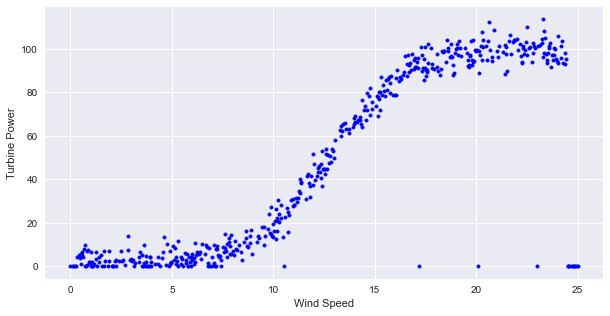

In [5]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.scatter(powerProduction["speed"], powerProduction["power"], marker='.', color="b")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")

## Predicting Values
***


### numpy polyfit
***

In [6]:
x, y = powerProduction["speed"], powerProduction["power"]

In [7]:
slope, intercept = np.polyfit(x, y, 1)
print(slope, intercept)

4.917595665404667 -13.899902630519604


Text(0, 0.5, 'Turbine Power')

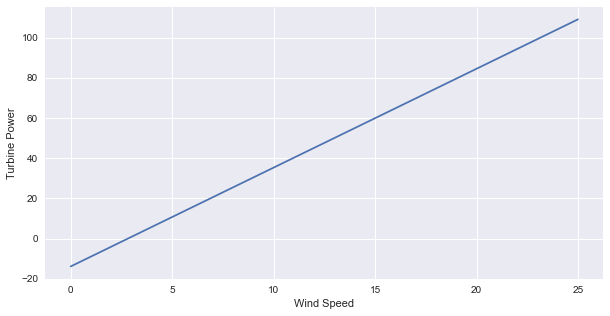

In [8]:
plt.plot(x, (x*slope)+intercept)
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")

In [9]:
straightLine = np.poly1d(np.polyfit(x, y, 1))

In [10]:
print(straightLine)

 
4.918 x - 13.9


Text(0, 0.5, 'Turbine Power')

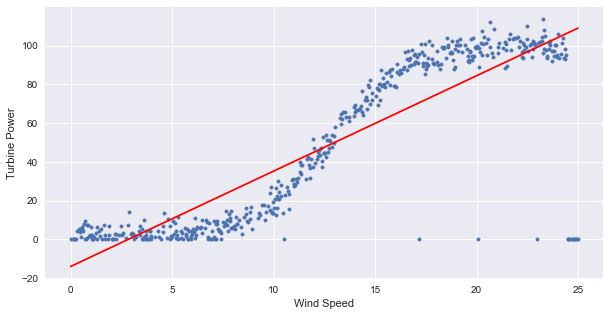

In [11]:
plt.scatter(powerProduction["speed"], powerProduction["power"], marker='.')
plt.plot(x, straightLine(x), color="r")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")

Polyfit 2 and 3 degrees

In [12]:
poly2 = np.polyfit(x, y, 2)

curvedLine = np.poly1d(poly2)

print(curvedLine)

          2
-0.07022 x + 6.674 x - 21.23


In [13]:
poly3d = np.polyfit(x, y, 3)

cubedPoly = np.poly1d(poly3d)

print(cubedPoly)
print(cubedPoly(10))


          3         2
-0.05242 x + 1.895 x - 12.94 x + 19.2
26.839199751315512


Text(0, 0.5, 'Turbine Power')

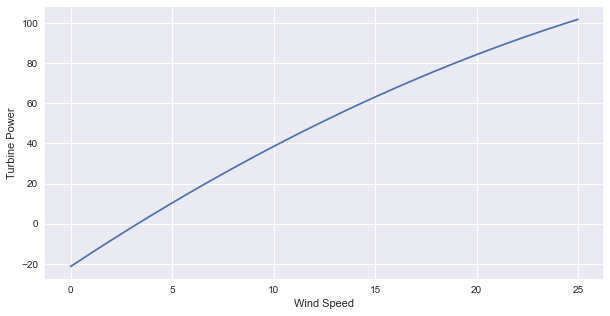

In [14]:
plt.plot(x, curvedLine(x))
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")

Text(0, 0.5, 'Turbine Power')

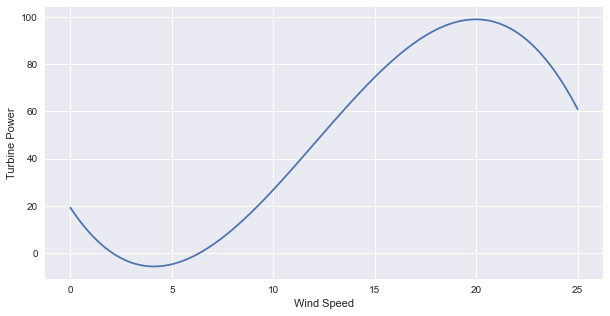

In [15]:
plt.plot(x, cubedPoly(x))
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")

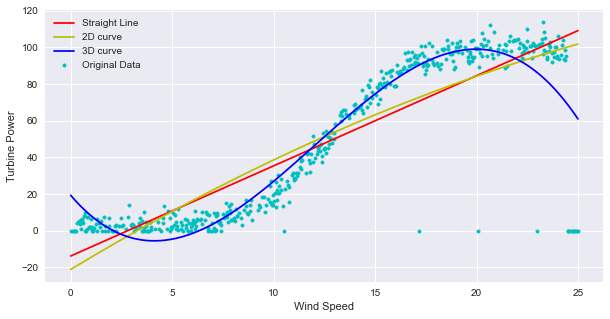

In [16]:
plt.scatter(powerProduction["speed"], powerProduction["power"], marker='.',color="c", label="Original Data")
plt.plot(x, straightLine(x), color="r", label="Straight Line")
plt.plot(x, curvedLine(x), color="y", label="2D curve")
plt.plot(x, cubedPoly(x), color="b", label="3D curve")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")
plt.legend()

## Calculating Cost
***


In [ ]:
def cost(x, y, poly):
    ls = []
    
    for i in range(len(x)):
        xval = x[i]
        yval = y[i]
        bf = poly(xval)
    
        cst = (yval-bf)**2
    
        ls.append(cst)
    
    return sum(ls)

In [66]:
print("Cost of straight-line: ", cost(x,y,straightLine))
print("Cost of curved-line: ", cost(x,y,curvedLine))
print("Cost of cubed line: ", cost(x,y,cubedPoly))

Cost of straight-line:  234241.16415321216
Cost of curved-line:  228833.2705765867
Cost of cubed line:  103967.8194705887


89274.04359595223


89525.1362198873


78891.14625521775


# References
***

1. Data Source. https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv
2. seaborn.pydata.org. seaborn.set_style. https://seaborn.pydata.org/generated/seaborn.set_style.html
3. ipython.readthedocs.io, Built-in magic commands. https://ipython.readthedocs.io/en/stable/interactive/magics.html
4. pandas.pydata.org. pandas.read_csv. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
5. pandas.pydata.org. pandas.DataFrame.head.  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
6. pandas.pydata.org. pandas.DataFrame.tail. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html 
7. pandas.pydata.org. pandas.DataFrame.describe. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
8. matplotlib.org matplotlib.pyplot.scatter. https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html


https://realpython.com/linear-regression-in-python/


https://www.sscc.edu/home/jdavidso/Math/Catalog/Polynomials/First/First.html
https://www.sscc.edu/home/jdavidso/Math/Catalog/Polynomials/Second/Second.html
https://www.sscc.edu/home/jdavidso/Math/Catalog/Polynomials/Third/Third.html